In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

In [2]:
df = pd.read_csv("Company_Data.csv")

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
df.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [6]:
df1 = df.copy()

In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [8]:
df1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [9]:
df1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [10]:
df1.shape

(400, 11)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


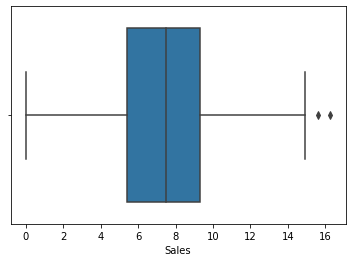

In [11]:
#Outlier Check
ax = sns.boxplot(df1['Sales'])

In [12]:
#The data has 2 outlier instances

In [13]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


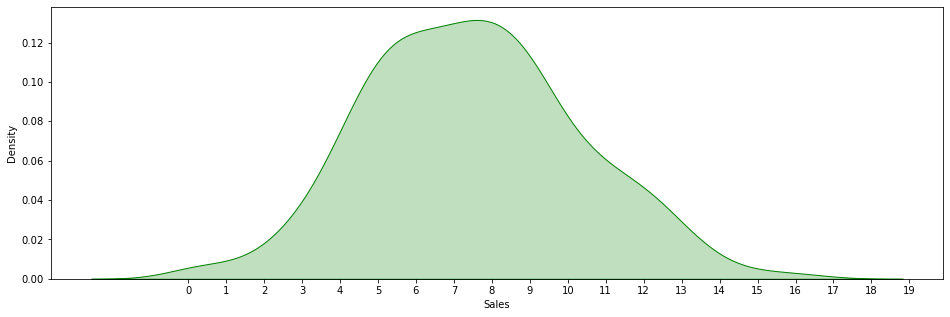

In [14]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Sales'].skew()))
print("Kurtosis: {}".format(df1['Sales'].kurtosis()))
ax = sns.kdeplot(df1['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

In [15]:
#The data is Skwed on the right
#The data has negative Kurtosis

In [16]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

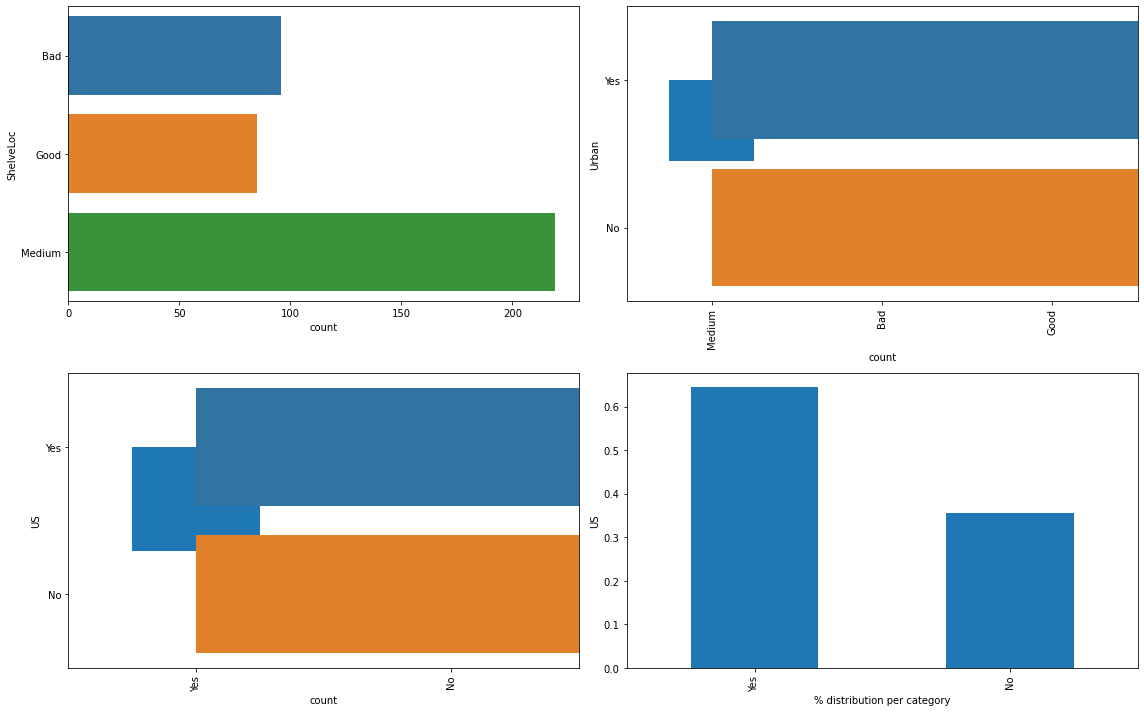

In [17]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

In [18]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

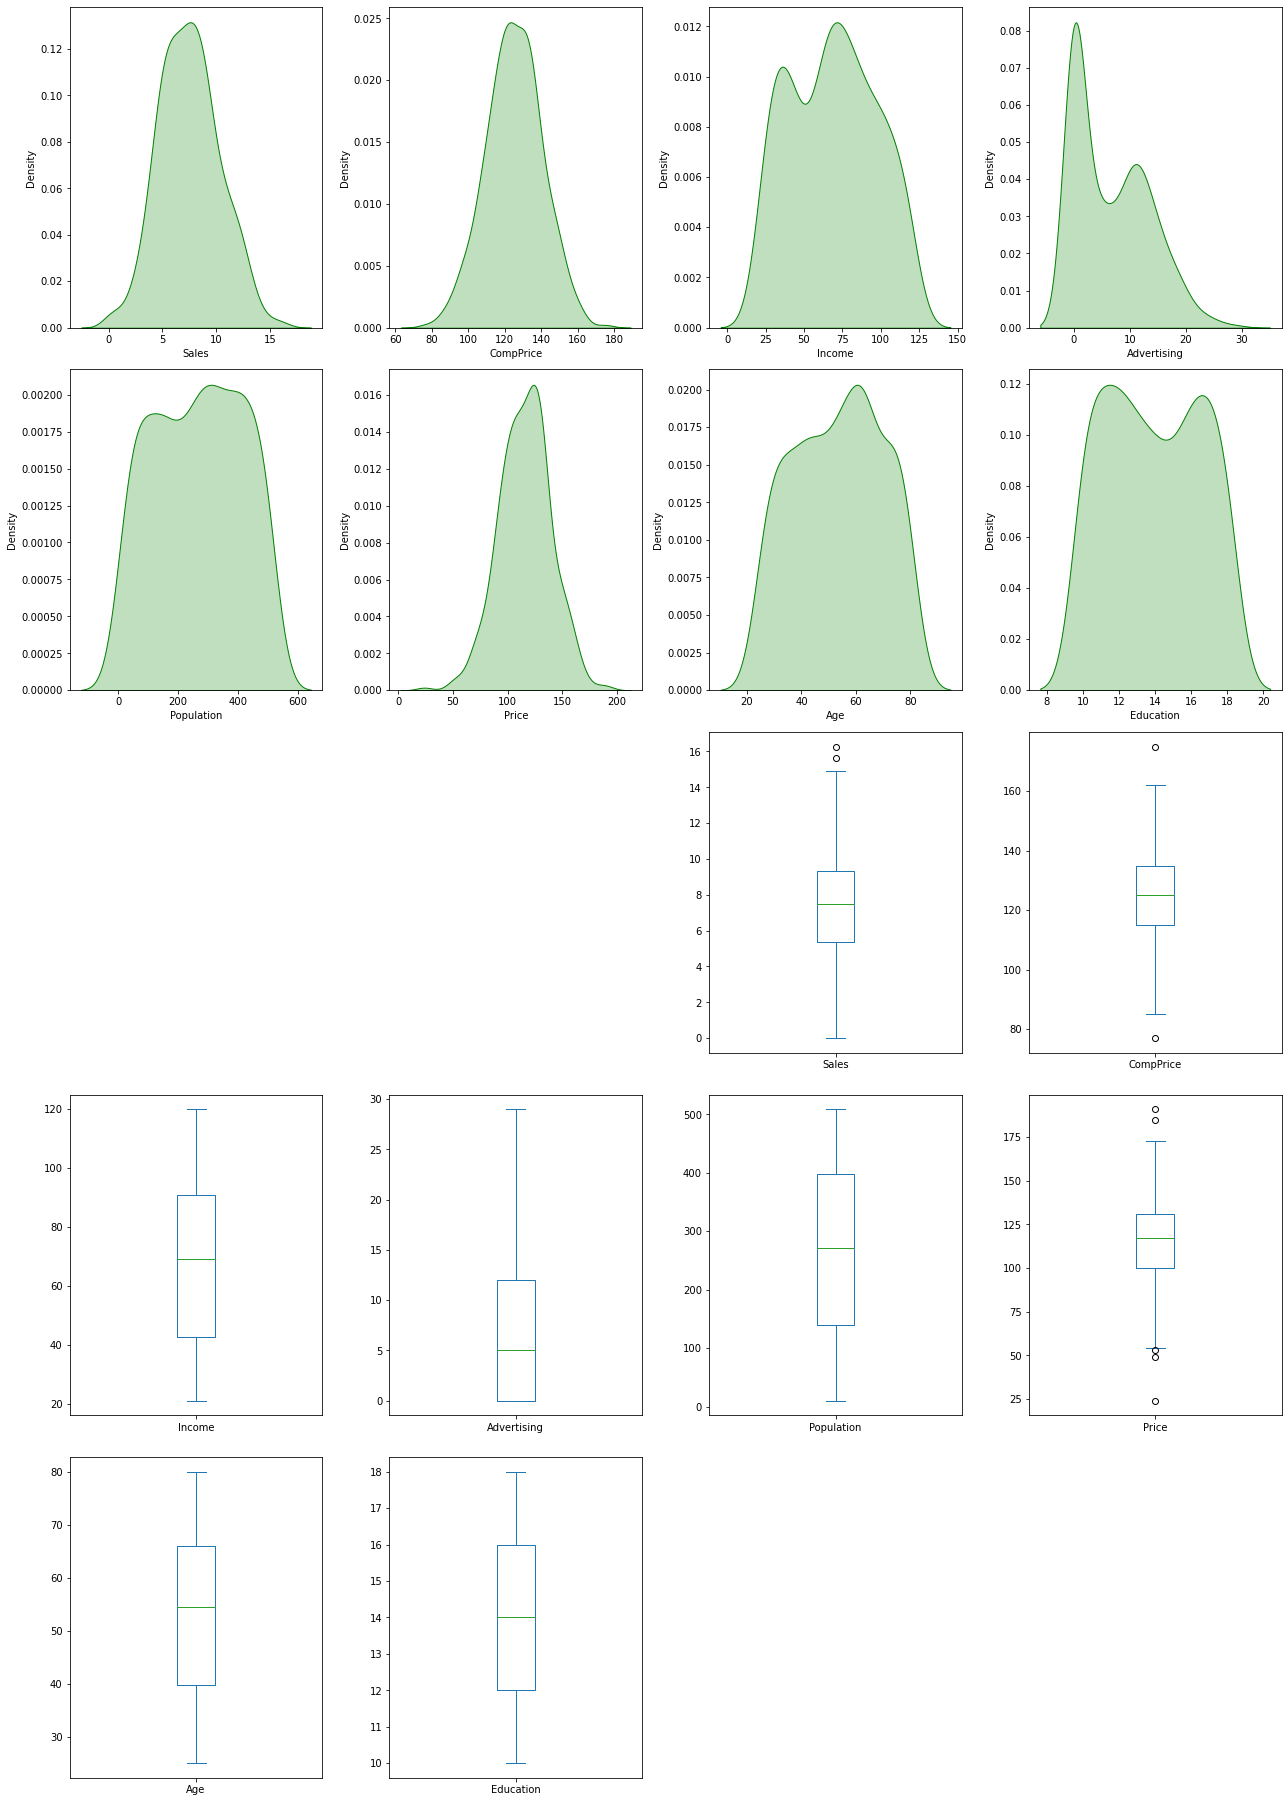

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [19]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [20]:
df1 = pd.get_dummies(df1, columns = ['ShelveLoc','Urban','US'])

In [21]:
corr = df1.corr()

<AxesSubplot:>

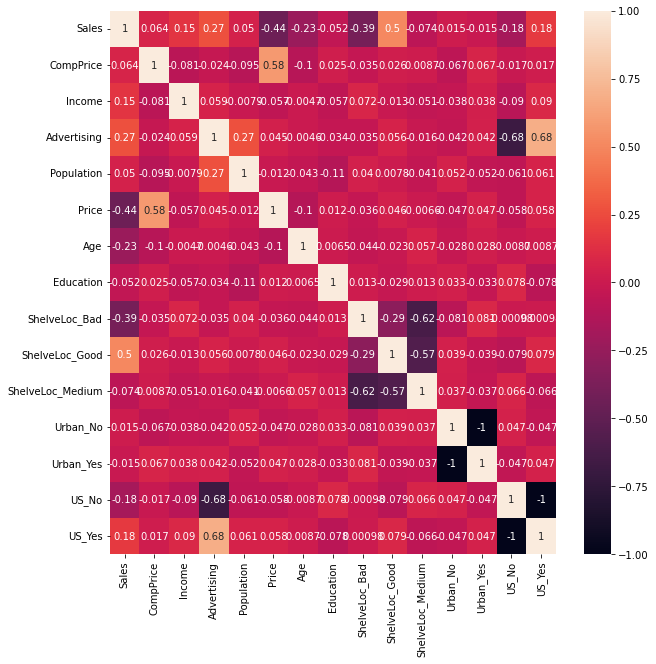

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [23]:
#Decision Tree - Model
#Since the target variable is continious, we create a class of the value based on the mean

In [24]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)

In [25]:
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y)

In [27]:
y_train.value_counts()

small    161
large    159
Name: sales, dtype: int64

In [28]:
model = DT(criterion='entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [29]:
pred_train = model.predict(x_train)

In [30]:
accuracy_score(y_train,pred_train)

1.0

In [31]:
confusion_matrix(y_train,pred_train)

array([[159,   0],
       [  0, 161]], dtype=int64)

In [32]:
pred_test = model.predict(x_test)

In [33]:
accuracy_score(y_test,pred_test)

0.75

In [34]:
confusion_matrix(y_test,pred_test)

array([[33,  7],
       [13, 27]], dtype=int64)

In [35]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [36]:
df_t

,Actual,Predicted
280,small,small
318,large,large
133,large,large
347,small,large
70,large,large
...,...,...
173,small,small
65,small,small
107,large,small
232,large,large


In [37]:
cols = list(df1.columns)

In [38]:
predictors = cols[0:14]
target = cols[14]

In [39]:
dot_data = StringIO()

In [40]:
export_graphviz(model,out_file = dot_data, filled =True, rounded = True, feature_names =predictors,class_names = target, impurity = False )

In [41]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [42]:
graph.write_png('company_full.png')

True

In [43]:
#Conclusion
#Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 75%

In [44]:
img = mpimg.imread("company_full.png")

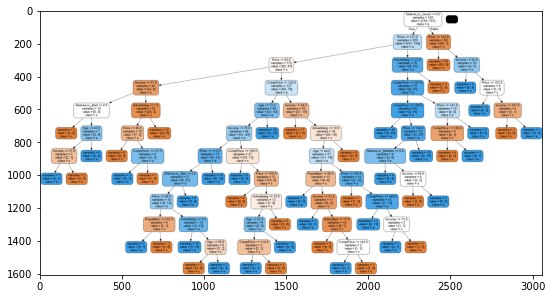

In [45]:
plt.imshow(img)

In [46]:
model.feature_importances_

array([0.16696549, 0.13110232, 0.11655149, 0.02280402, 0.30727757,
       0.08769267, 0.00840635, 0.02342737, 0.12799054, 0.00778217,
       0.        , 0.        , 0.        , 0.        ])

In [47]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [48]:
fi

,feature,importance
4,Price,0.307278
0,CompPrice,0.166965
1,Income,0.131102
8,ShelveLoc_Good,0.127991
2,Advertising,0.116551
5,Age,0.087693
7,ShelveLoc_Bad,0.023427
3,Population,0.022804
6,Education,0.008406
9,ShelveLoc_Medium,0.007782
